**Variance Treshold**

In [4]:
import pandas as pd
data=pd.DataFrame({
    'age':[25,30,35,40,45],
    'salary':[5000,6000, 7000, 8000, 9000],
    'country_code': [1,1,1,1,1]
})
data

,age,salary,country_code
0,25,5000,1
1,30,6000,1
2,35,7000,1
3,40,8000,1
4,45,9000,1


In [10]:
from sklearn.feature_selection import VarianceThreshold

selector=VarianceThreshold(threshold=0.1)
selected_data=selector.fit_transform(data)

selected_features=data.columns[selector.get_support()]

print("Selected Features:", selected_features)

Selected Features: Index(['age', 'salary'], dtype='object')


In [12]:
data2 = {
    "Age": [45, 50, 37, 60, 29],
    "Blood_Pressure": [130, 140, 120, 150, 110],
    "Cholesterol_Level": [200, 220, 180, 240, 170],
    "Gender": ["M", "F", "M", "F", "M"],
    "Country_Code": ["India", "India", "India", "India", "India"],
    "Hospital_ID": ["HSP001", "HSP001", "HSP001", "HSP001", "HSP001"],
    "Machine_Version": ["v2.1", "v2.1", "v2.1", "v2.1", "v2.2"]
}

df = pd.DataFrame(data2)

print(df)

   Age  Blood_Pressure  Cholesterol_Level Gender Country_Code Hospital_ID  \
0   45             130                200      M        India      HSP001   
1   50             140                220      F        India      HSP001   
2   37             120                180      M        India      HSP001   
3   60             150                240      F        India      HSP001   
4   29             110                170      M        India      HSP001   

  Machine_Version  
0            v2.1  
1            v2.1  
2            v2.1  
3            v2.1  
4            v2.2  


In [14]:
print(df.nunique())

Age                  5
Blood_Pressure       5
Cholesterol_Level    5
Gender               2
Country_Code         1
Hospital_ID          1
Machine_Version      2
dtype: int64


In [16]:
# Remove columns with only one unique value
constant_columns = [col for col in df.columns if df[col].nunique() == 1]

print("Constant Columns:", constant_columns)

df_filtered = df.drop(columns=constant_columns)

print(df_filtered)

Constant Columns: ['Country_Code', 'Hospital_ID']
   Age  Blood_Pressure  Cholesterol_Level Gender Machine_Version
0   45             130                200      M            v2.1
1   50             140                220      F            v2.1
2   37             120                180      M            v2.1
3   60             150                240      F            v2.1
4   29             110                170      M            v2.2


In [18]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# Encode categorical columns
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [20]:
from sklearn.feature_selection import VarianceThreshold

# Set threshold (0.01 = very low variance)
selector = VarianceThreshold(threshold=0.01)

selector.fit(df_encoded)

# Columns to keep
selected_columns = df_encoded.columns[selector.get_support()]

print("Selected Columns:", selected_columns)

Selected Columns: Index(['Age', 'Blood_Pressure', 'Cholesterol_Level', 'Gender',
       'Machine_Version'],
      dtype='object')


**correlation coefficient**

In [23]:
import numpy as np

data3=pd.DataFrame({
    'size_sqft':[1000,1500,2000,2500,3000],
    'titles_count':[100,150,200,250,300],
    'price':[200000,300000,400000,500000,600000]
})
data3

,size_sqft,titles_count,price
0,1000,100,200000
1,1500,150,300000
2,2000,200,400000
3,2500,250,500000
4,3000,300,600000


In [27]:
correlation_matrix=data3.corr()
print(correlation_matrix)

              size_sqft  titles_count  price
size_sqft           1.0           1.0    1.0
titles_count        1.0           1.0    1.0
price               1.0           1.0    1.0


import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r')
plt.show()

In [33]:
#Removing highly correlated features (>0.9)

upper=correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool)
)

to_drop=[column for column in upper.columns if any(upper[column]>0.9)]
print("Highly Correlated Featured to Drop:", to_drop)

Highly Correlated Featured to Drop: ['titles_count', 'price']


In [35]:
data4=pd.DataFrame({
    'size_sqft':[1000,1500,2000,2500,3000],
    'titles_count':[100,150,200,250,300],
    'construction_cost':[1000000,1500000,2000000,2500000,3000000],
    'total_bedrooms':[2,3,4,5,6],
    'price':[200000,300000,400000,500000,600000]
})
data4

,size_sqft,titles_count,construction_cost,total_bedrooms,price
0,1000,100,1000000,2,200000
1,1500,150,1500000,3,300000
2,2000,200,2000000,4,400000
3,2500,250,2500000,5,500000
4,3000,300,3000000,6,600000


In [37]:
correlation_matrix=data4.corr()
print(correlation_matrix)

                   size_sqft  titles_count  construction_cost  total_bedrooms  \
size_sqft                1.0           1.0                1.0             1.0   
titles_count             1.0           1.0                1.0             1.0   
construction_cost        1.0           1.0                1.0             1.0   
total_bedrooms           1.0           1.0                1.0             1.0   
price                    1.0           1.0                1.0             1.0   

                   price  
size_sqft            1.0  
titles_count         1.0  
construction_cost    1.0  
total_bedrooms       1.0  
price                1.0  


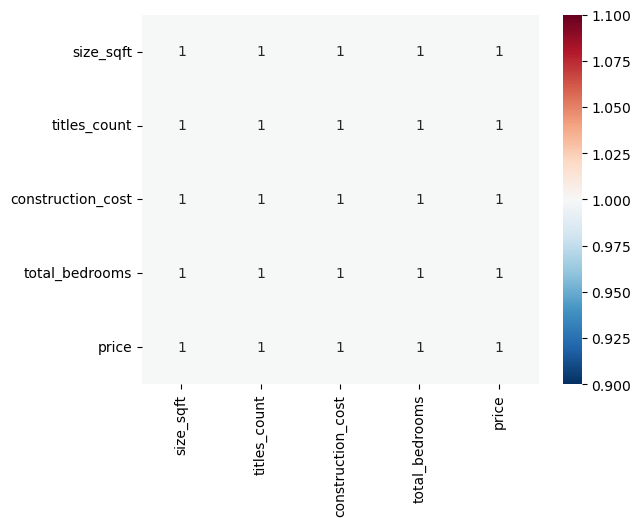

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r')
plt.show()

In [41]:
#Removing highly correlated features (>0.9)

upper=correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool)
)

to_drop=[column for column in upper.columns if any(upper[column]>0.9)]
print("Highly Correlated Featured to Drop:", to_drop)

Highly Correlated Featured to Drop: ['titles_count', 'construction_cost', 'total_bedrooms', 'price']


**Chi-Square Test**

In [44]:
X=pd.DataFrame({
    'gender': [0,1,0,1,1],
    'married': [1,1,0,0,1],
    'income':[20000,40000, 50000, 30000, 60000]
})
y=[0,1,1,0,1]
X

,gender,married,income
0,0,1,20000
1,1,1,40000
2,0,0,50000
3,1,0,30000
4,1,1,60000


In [46]:
# Chi-Square Requires non-negative values

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler

scalar=MinMaxScaler()
X_scaled=scalar.fit_transform(X)

selector=SelectKBest(score_func=chi2,k=2)
X_new=selector.fit_transform(X_scaled,y)

selected_features=X.columns[selector.get_support()]

print("Selected Features:",selected_features);

Selected Features: Index(['married', 'income'], dtype='object')


In [48]:
data5 = {
    "Gender": ["Male", "Female", "Male", "Male", "Female"],
    "Marital_Status": ["Yes", "No", "Yes", "Yes", "No"],
    "Education_Level": ["Graduate", "Non-Graduate", "Graduate", "Graduate", "Non-Graduate"],
    "Applicant_Income": [5000, 3000, 4000, 6000, 3500],
    "Property_Area": ["Urban", "Rural", "Urban", "Urban", "Rural"],
    "Favorite_Color": ["Red", "Blue", "Green", "Blue", "Red"],
    "Loan_Status": ["Approved", "Rejected", "Approved", "Approved", "Rejected"]
}

df = pd.DataFrame(data5)

print(df)

   Gender Marital_Status Education_Level  Applicant_Income Property_Area  \
0    Male            Yes        Graduate              5000         Urban   
1  Female             No    Non-Graduate              3000         Rural   
2    Male            Yes        Graduate              4000         Urban   
3    Male            Yes        Graduate              6000         Urban   
4  Female             No    Non-Graduate              3500         Rural   

  Favorite_Color Loan_Status  
0            Red    Approved  
1           Blue    Rejected  
2          Green    Approved  
3           Blue    Approved  
4            Red    Rejected  


In [50]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

le = LabelEncoder()

for col in df_encoded.columns:
    if df_encoded[col].dtype == "object":
        df_encoded[col] = le.fit_transform(df_encoded[col])

print(df_encoded)

   Gender  Marital_Status  Education_Level  Applicant_Income  Property_Area  \
0       1               1                0              5000              1   
1       0               0                1              3000              0   
2       1               1                0              4000              1   
3       1               1                0              6000              1   
4       0               0                1              3500              0   

   Favorite_Color  Loan_Status  
0               2            0  
1               0            1  
2               1            0  
3               0            0  
4               2            1  


In [52]:
X = df_encoded.drop("Loan_Status", axis=1)
y = df_encoded["Loan_Status"]

In [54]:
from sklearn.feature_selection import chi2

chi_scores = chi2(X, y)

In [56]:
chi_results = pd.DataFrame({
    "Feature": X.columns,
    "Chi2_Score": chi_scores[0],
    "P_Value": chi_scores[1]
})

chi_results.sort_values(by="Chi2_Score", ascending=False, inplace=True)

print(chi_results)

            Feature  Chi2_Score        P_Value
3  Applicant_Income  854.651163  7.085932e-188
2   Education_Level    3.000000   8.326452e-02
0            Gender    2.000000   1.572992e-01
1    Marital_Status    2.000000   1.572992e-01
4     Property_Area    2.000000   1.572992e-01
5    Favorite_Color    0.000000   1.000000e+00


In [58]:
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(score_func=chi2, k=4)

X_selected = selector.fit_transform(X, y)

selected_columns = X.columns[selector.get_support()]

print("Selected Features:", selected_columns)

Selected Features: Index(['Marital_Status', 'Education_Level', 'Applicant_Income',
       'Property_Area'],
      dtype='object')
